In [11]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [12]:
#reading dataframe
df=pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
#counting number of fraud and no fraid values
print('Fraud:',df['Class'].value_counts()[1],'\n','No Fraud:',df['Class'].value_counts()[0])

Fraud: 492 
 No Fraud: 284315


In [15]:
#Creating sub-sumple with equal no. of Fraud and NO Fraud to have normal distribution of classes
df=df.sample(frac=1)
fraud=df[df['Class']==1]
Nfraud=df[df['Class']==0][:492]
newDf=pd.concat([fraud,Nfraud]).sample(frac=1,random_state=5)
newDf.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67992,52784.0,1.365986,-1.164546,0.414782,-1.489095,-1.414515,-0.457158,-0.941851,-0.091186,-2.154861,...,-0.379263,-0.913975,0.097314,-0.055515,0.123996,-0.485891,0.021965,0.026906,77.95,0
34461,37679.0,-0.940216,0.649389,1.090110,-0.731127,1.127172,-0.758374,1.190784,-0.165229,-0.830651,...,-0.342547,-1.287248,-0.123300,-0.645802,0.471592,0.114410,-0.074981,0.050843,50.00,0
209,140.0,1.175478,0.167881,0.509909,0.452332,-0.215763,-0.192104,-0.105404,0.068517,-0.249733,...,-0.176147,-0.500566,0.151263,0.018347,0.122003,0.106307,-0.014937,0.005771,1.29,0
275516,166570.0,-0.099145,0.170439,-0.150389,-1.507628,-0.446488,-0.532024,-0.501147,0.482081,-1.270407,...,0.164451,0.131291,0.255904,-0.630388,-1.096982,-0.523620,0.032412,0.050266,42.48,0
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


0    0.5
1    0.5
Name: Class, dtype: float64


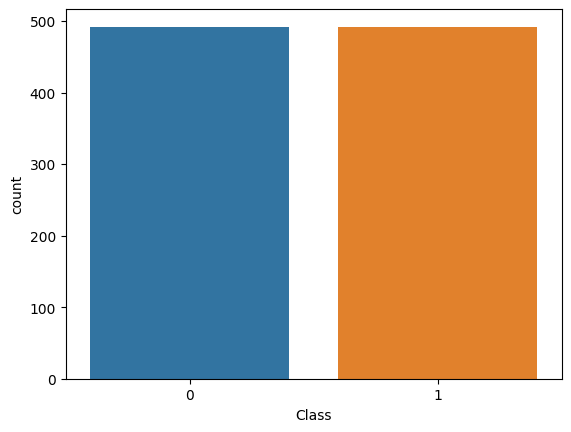

In [16]:
print(newDf['Class'].value_counts()/len(newDf))
sns.countplot(data=newDf,x='Class')
plt.show()

In [17]:
#scaling features
x=newDf.drop('Class',axis=1)
y=newDf['Class']
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [18]:
#spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [19]:
#applying Logistic regression and evaluating model
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96        96
           1       0.98      0.95      0.96       101

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [20]:
#testing model on new values
values=[[6,-0.594286082,0.256157196,-0.213192213,-0.27452613,1.67859866,2.722818061,1.370145128,0.841084443,-0.492047587,-0.4104304234,-0.705145587,-0.110452262,-0.286253632,0.07435536,-0.32878305,-0.2100892268,-0.499767969,0.118764861,0.370328167,0.152735669	,-0.0734251,-0.268091632,-0.20423267,1.011591802,0.37320468,-0.384157308,0.011747356,0.14240433,101.3
]]
values=scaler.transform(values)
prediction=LR.predict(values)
if(prediction==0):
    print('No Fraud')
else:
    print('Fraud')

No Fraud


c:\Users\J.Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
